## Data Collection or Extraction

In [1]:
import requests
import json


r = requests.post('https://api.rootnet.in/covid19-in/unofficial/covid19india.org')
api = json.loads(r.text)


In [2]:
info = api['data']['rawPatientData']

In [3]:
len(info)

27891

# Data Cleaning

In [4]:
Id = []
reportedOn = []
onsetEstimate = []
gender = []
city = []
district = []
state = []
status = []
contractedFrom =[]
nationality =[]
relationship = []
travel = []
notes = []

In [5]:
info[-1]

{'patientId': 27891,
 'reportedOn': '26/04/2020',
 'onsetEstimate': '',
 'ageEstimate': '17',
 'gender': 'female',
 'city': '',
 'district': 'Munger',
 'state': 'Bihar',
 'status': 'Hospitalized',
 'notes': 'Details awaited',
 'nationality': [],
 'place_attributes': [],
 'relationship': [],
 'travel': []}

In [6]:
import numpy as np

In [7]:

for i in range(27891):
    Id.append(info[i]['patientId'])
    reportedOn.append(info[i]['reportedOn'])
    gender.append(info[i]['gender'])
    city.append(info[i]['city'])
    state.append(info[i]['state'])
    status.append(info[i]['status'])




In [8]:
data = {'id': Id, 
        'reportedOn' : reportedOn,
        'sex': gender,
        'city': city,
        'district':district,
        'state':state,
        'status':status}

In [9]:
import pandas as pd

try:
    data = pd.DataFrame({'id' : Id, 
    'reportedOn' : reportedOn,
    'sex':gender,
    'city':city,
    'state':state,
    'status':status,
    })
except:
    pass

In [10]:
data.head()

,id,reportedOn,sex,city,state,status
0,1,30/01/2020,female,Thrissur,Kerala,Recovered
1,2,02/02/2020,,Alappuzha,Kerala,Recovered
2,3,03/02/2020,,Kasaragod,Kerala,Recovered
3,4,02/03/2020,male,East Delhi (Mayur Vihar),Delhi,Recovered
4,5,02/03/2020,male,Hyderabad,Telangana,Recovered


In [11]:
data.to_csv('api.csv')

# Feature Engineering

In [12]:
data = pd.read_csv('api.csv')
data.tail()

,Unnamed: 0,id,reportedOn,sex,city,state,status
27886,27886,27887,26/04/2020,NaN,NaN,Delhi,Hospitalized
27887,27887,27888,26/04/2020,NaN,NaN,Uttarakhand,Hospitalized
27888,27888,27889,26/04/2020,female,NaN,Bihar,Hospitalized
27889,27889,27890,26/04/2020,female,NaN,Bihar,Hospitalized
27890,27890,27891,26/04/2020,female,NaN,Bihar,Hospitalized


In [13]:
day = []
month = []
year = []


for i in range(len(data)):
    day.append(data.reportedOn[i].split('/')[0])
    month.append(data.reportedOn[i].split('/')[1])
    year.append(data.reportedOn[i].split('/')[2])

In [14]:
data['Day'] = day
data['Month'] = month

In [15]:
data.head()

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
0,0,1,30/01/2020,female,Thrissur,Kerala,Recovered,30,01
1,1,2,02/02/2020,NaN,Alappuzha,Kerala,Recovered,02,02
2,2,3,03/02/2020,NaN,Kasaragod,Kerala,Recovered,03,02
3,3,4,02/03/2020,male,East Delhi (Mayur Vihar),Delhi,Recovered,02,03
4,4,5,02/03/2020,male,Hyderabad,Telangana,Recovered,02,03


In [16]:
data.isna().sum()/len(data)

Unnamed: 0    0.000000
id            0.000000
reportedOn    0.000000
sex           0.809508
city          0.915851
state         0.000036
status        0.000000
Day           0.000000
Month         0.000000
dtype: float64

In [17]:
data['sex'] = data.sex.fillna('others/notIdentified')
data['city'] = data.city.fillna('unknown')
data['state'] = data.state.fillna('unknown')

In [18]:
data.isna().sum()/len(data)

Unnamed: 0    0.0
id            0.0
reportedOn    0.0
sex           0.0
city          0.0
state         0.0
status        0.0
Day           0.0
Month         0.0
dtype: float64

In [19]:
for i in data.columns:
    print(f"The total number of unique observations in {i} is {len(data[f'{i}'].unique())}")

The total number of unique observations in Unnamed: 0 is 27891
The total number of unique observations in id is 27891
The total number of unique observations in reportedOn is 59
The total number of unique observations in sex is 3
The total number of unique observations in city is 512
The total number of unique observations in state is 33
The total number of unique observations in status is 4
The total number of unique observations in Day is 31
The total number of unique observations in Month is 4


## Seperating data by month

In [20]:
Jan = data[data.Month=='01']

Feb = data[data.Month=='02']

March = data[data.Month=='03']

April = data[data.Month=='04']

In [21]:
March

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
3,3,4,02/03/2020,male,East Delhi (Mayur Vihar),Delhi,Recovered,02,03
4,4,5,02/03/2020,male,Hyderabad,Telangana,Recovered,02,03
5,5,6,03/03/2020,male,Jaipur,Rajasthan,Recovered,03,03
6,6,7,04/03/2020,others/notIdentified,Gurugram,Haryana,Recovered,04,03
7,7,8,04/03/2020,others/notIdentified,Gurugram,Haryana,Recovered,04,03
...,...,...,...,...,...,...,...,...,...
1630,1630,1907,31/03/2020,others/notIdentified,unknown,West Bengal,Hospitalized,31,03
1631,1631,1908,31/03/2020,others/notIdentified,unknown,West Bengal,Hospitalized,31,03
1632,1632,1909,31/03/2020,others/notIdentified,unknown,West Bengal,Hospitalized,31,03
1633,1633,1910,31/03/2020,others/notIdentified,unknown,West Bengal,Hospitalized,31,03


In [22]:
March.Day = pd.to_numeric(March.Day)

TotalnumberMarch = {}

for i in range(len(March.Day)):
    if i != (March.Day.unique()[-1]+1):
        count = 0
        while count<len(March.loc[March.Day== i]):
            count +=1
        TotalnumberMarch[f'day {i}'] = f'{count}'
    else:
        break

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
TotalnumberMarch

{'day 0': '0',
 'day 1': '0',
 'day 2': '2',
 'day 3': '1',
 'day 4': '22',
 'day 5': '2',
 'day 6': '1',
 'day 7': '3',
 'day 8': '5',
 'day 9': '9',
 'day 10': '15',
 'day 11': '8',
 'day 12': '10',
 'day 13': '10',
 'day 14': '11',
 'day 15': '10',
 'day 16': '14',
 'day 17': '20',
 'day 18': '25',
 'day 19': '27',
 'day 20': '58',
 'day 21': '78',
 'day 22': '69',
 'day 23': '94',
 'day 24': '74',
 'day 25': '86',
 'day 26': '73',
 'day 27': '153',
 'day 28': '136',
 'day 29': '120',
 'day 30': '187',
 'day 31': '309'}

In [24]:
April.Day = pd.to_numeric(April.Day)

TotalnumberApril = {}

for i in range(len(April.Day)):
    if i != (April.Day.unique()[-1]+1):
        count = 0
        while count<len(April.loc[April.Day== i]):
            count +=1
        TotalnumberApril[f'day {i}'] = f'{count}'
    else:
        break


In [25]:
TotalnumberApril['day 0'] = TotalnumberMarch['day 31']

In [26]:
pd.DataFrame([TotalnumberApril.keys(),TotalnumberApril.values()], index=['days', 'cases']) .T.to_csv('april.csv')

In [27]:
with open('april.json', 'w') as f:
    json.dump(json.dumps(TotalnumberApril), f)

## Data Analysis and Dataviz

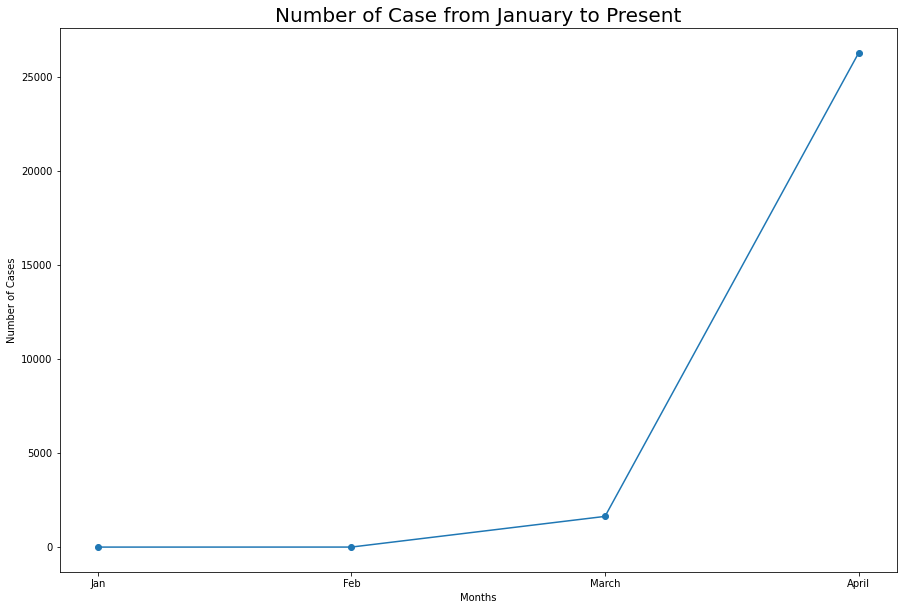

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.plot(pd.DataFrame({'Jan':[len(Jan)],'Feb': [len(Feb)],
             'March': [len(March)],
             'April':[len(April)]}).T, '-o')
plt.title('Number of Case from January to Present', fontsize=20)
plt.xlabel('Months')
plt.ylabel('Number of Cases')


plt.show()

plt.savefig('Growth of Covid In India.png', dpi=300)

### Finding the growth rate

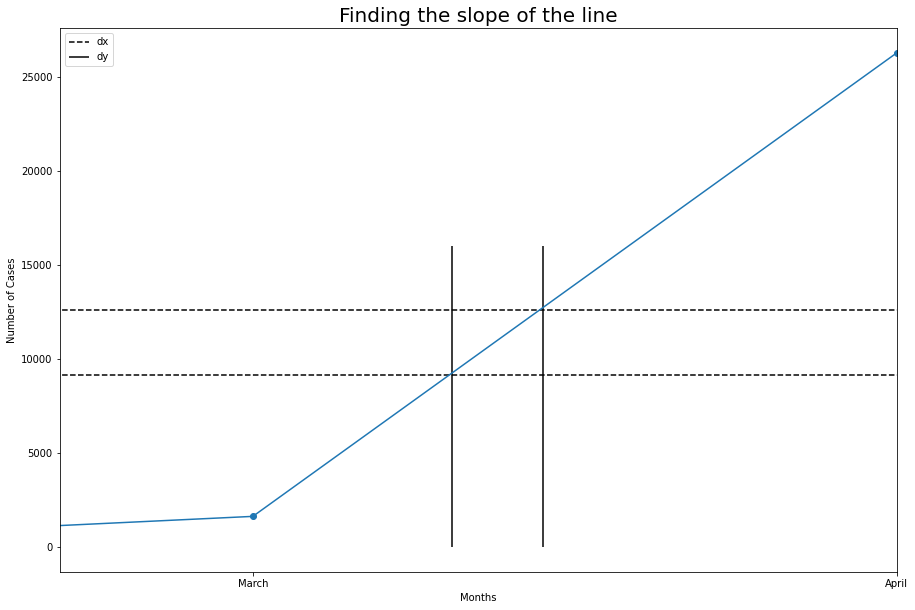

In [29]:
plt.figure(figsize=(15, 10))
plt.plot(pd.DataFrame({'Jan':[len(Jan)],'Feb': [len(Feb)],
             'March': [len(March)],
             'April':[len(April)]}).T, '-o')
plt.title('Finding the slope of the line', fontsize=20)
plt.xlabel('Months')
plt.ylabel('Number of Cases')

plt.xlim(1.7, 3)

plt.hlines(9150, 0, 4, linestyles='--', label='dx')
plt.hlines(12610, 0, 4, linestyles='--')
plt.vlines(2.31, 0, 16000, linestyles='-', label='dy')
plt.vlines(2.45, 0, 16000, linestyles='-')


plt.legend()

In [30]:
April.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [31]:
April.loc[April.Day == 1]

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
1635,1635,1620,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1636,1636,1621,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1637,1637,1622,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1638,1638,1623,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1639,1639,1624,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
...,...,...,...,...,...,...,...,...,...
2054,2054,2056,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2055,2055,2057,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2056,2056,2058,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2057,2057,2059,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04


In [32]:
import numpy as np

gr = np.log(len(April.loc[April.Day == 26]) - len(April.loc[April.Day == 1])/(24*26))
gr

7.3817014467122215

In [33]:
len(April.loc[April.status == 'Deceased'])

23

In [34]:
from ipywidgets import interactive

## Predicting the behaviour of the Virus

### Susceptible Infectious Recovery


### Runge Kutta 4th Order Differentiation

In [35]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [36]:
def rungeKutta(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [37]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rungeKutta(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

In [38]:
def plot(Population, b0, growthRate, RecoveryRate, hs):
    sus, inf, rec = SIR(Population, b0, growthRate, RecoveryRate, hs)
    f = plt.figure(figsize=(15,8)) 
    plt.plot(sus, 'b-', label='susceptible');
    plt.plot(inf, 'r-', label='infected');
    plt.plot(rec, 'c-', label='recovered/deceased');
    plt.title("SIR model")
    plt.xlabel("time", fontsize=10);
    plt.ylabel("Fraction of population", fontsize=10);
    plt.legend(loc='best')
    plt.xlim(0,1000)
    plt.savefig('SIR Model India.png', dpi=300)
    plt.show()
    
interactive_plot = interactive(plot, Population=(1352400000,1352600000, 100), b0=(0, 2, 0.5),
                              growthRate = (6,7,0.1), RecoveryRate = (0, 5, 0.02), hs=(0, 1, 0.01))
output = interactive_plot.children[0]
interactive_plot

interactive(children=(IntSlider(value=1352500000, description='Population', max=1352600000, min=1352400000, st…

> The current parameter in India is as follows:
    - Population : 1352600000
    - Growth Rate : 6.31 to 6.50
    - Recovery Rate : 0.03 t0 0.1

# Plotting cases per Month

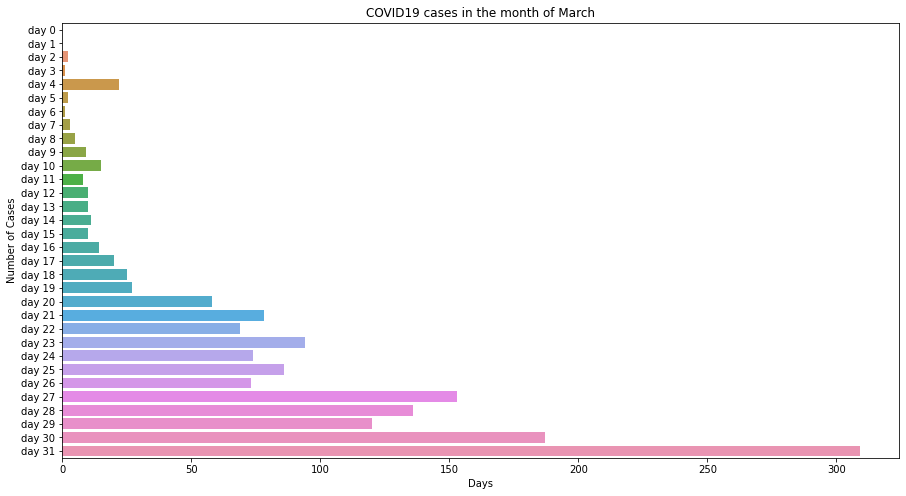

In [39]:
plt.figure(figsize=(15,8))
keys = list(TotalnumberMarch.keys())
values = list(TotalnumberMarch.values())
sns.barplot(values, keys)
plt.title('COVID19 cases in the month of March')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.show()

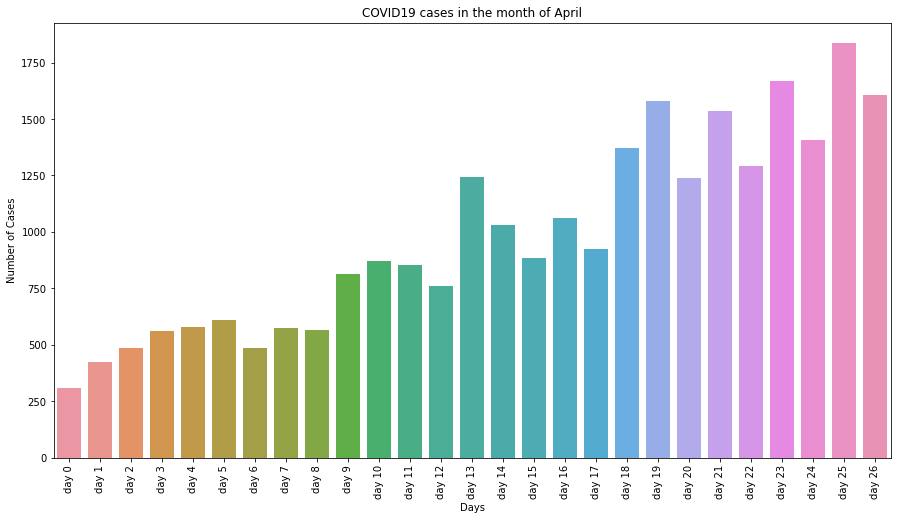

In [40]:
plt.figure(figsize=(15,8))
keys = list(TotalnumberApril.keys())
values = list(TotalnumberApril.values())
sns.barplot(keys, values)
plt.title('COVID19 cases in the month of April')
plt.xlabel('Days')
plt.ylabel('Number of Cases')

plt.xticks(rotation=90)
plt.show()

In [41]:
stateWise = {}
for i in data.state.unique():
    stateWise[f'{i}'] = data.loc[data.state == f'{i}']
    print(i)
    
stateWise

Kerala
Delhi
Telangana
Rajasthan
Haryana
Uttar Pradesh
Ladakh
Tamil Nadu
Jammu and Kashmir
Karnataka
Maharashtra
Punjab
Andhra Pradesh
Uttarakhand
Odisha
Puducherry
West Bengal
Chandigarh
Chhattisgarh
Gujarat
Himachal Pradesh
Madhya Pradesh
Bihar
Manipur
Mizoram
Goa
Andaman and Nicobar Islands
Jharkhand
Assam
Arunachal Pradesh
unknown
Tripura
Meghalaya


{'Kerala':        Unnamed: 0     id  reportedOn                   sex       city   state  \
 0               0      1  30/01/2020                female   Thrissur  Kerala   
 1               1      2  02/02/2020  others/notIdentified  Alappuzha  Kerala   
 2               2      3  03/02/2020  others/notIdentified  Kasaragod  Kerala   
 34             34     35  08/03/2020                  male      Ranni  Kerala   
 35             35     36  08/03/2020                  male      Ranni  Kerala   
 ...           ...    ...         ...                   ...        ...     ...   
 26525       26525  26526  26/04/2020  others/notIdentified    unknown  Kerala   
 26526       26526  26527  26/04/2020  others/notIdentified    unknown  Kerala   
 26527       26527  26528  26/04/2020  others/notIdentified    unknown  Kerala   
 26528       26528  26529  26/04/2020  others/notIdentified    unknown  Kerala   
 26529       26529  26530  26/04/2020  others/notIdentified    unknown  Kerala   
 
    

In [122]:
for i in range(1,10):
    print(i, len(stateWise['Delhi'].loc[stateWise['Delhi'].Day == f'0{i}']))


1 32
2 142
3 93
4 59
5 59
6 23
7 51
8 93
9 52


In [42]:
AprilRecordStateWise = {}
for i in stateWise.keys():
    print(i, ':',len(stateWise[f'{i}'].loc[stateWise[f'{i}'].Month == '04']))
    AprilRecordStateWise[f'{i}'] = len(stateWise[f'{i}'].loc[stateWise[f'{i}'].Month == '04'])

Kerala : 228
Delhi : 2798
Telangana : 904
Rajasthan : 2092
Haryana : 253
Uttar Pradesh : 1769
Ladakh : 7
Tamil Nadu : 1761
Jammu and Kashmir : 468
Karnataka : 402
Maharashtra : 7766
Punjab : 280
Andhra Pradesh : 1053
Uttarakhand : 44
Odisha : 99
Puducherry : 7
West Bengal : 574
Chandigarh : 21
Chhattisgarh : 28
Gujarat : 3227
Himachal Pradesh : 37
Madhya Pradesh : 2024
Bihar : 256
Manipur : 1
Mizoram : 0
Goa : 2
Andaman and Nicobar Islands : 23
Jharkhand : 81
Assam : 35
Arunachal Pradesh : 1
unknown : 1
Tripura : 2
Meghalaya : 12


In [43]:
AprilRecordStateWise

{'Kerala': 228,
 'Delhi': 2798,
 'Telangana': 904,
 'Rajasthan': 2092,
 'Haryana': 253,
 'Uttar Pradesh': 1769,
 'Ladakh': 7,
 'Tamil Nadu': 1761,
 'Jammu and Kashmir': 468,
 'Karnataka': 402,
 'Maharashtra': 7766,
 'Punjab': 280,
 'Andhra Pradesh': 1053,
 'Uttarakhand': 44,
 'Odisha': 99,
 'Puducherry': 7,
 'West Bengal': 574,
 'Chandigarh': 21,
 'Chhattisgarh': 28,
 'Gujarat': 3227,
 'Himachal Pradesh': 37,
 'Madhya Pradesh': 2024,
 'Bihar': 256,
 'Manipur': 1,
 'Mizoram': 0,
 'Goa': 2,
 'Andaman and Nicobar Islands': 23,
 'Jharkhand': 81,
 'Assam': 35,
 'Arunachal Pradesh': 1,
 'unknown': 1,
 'Tripura': 2,
 'Meghalaya': 12}

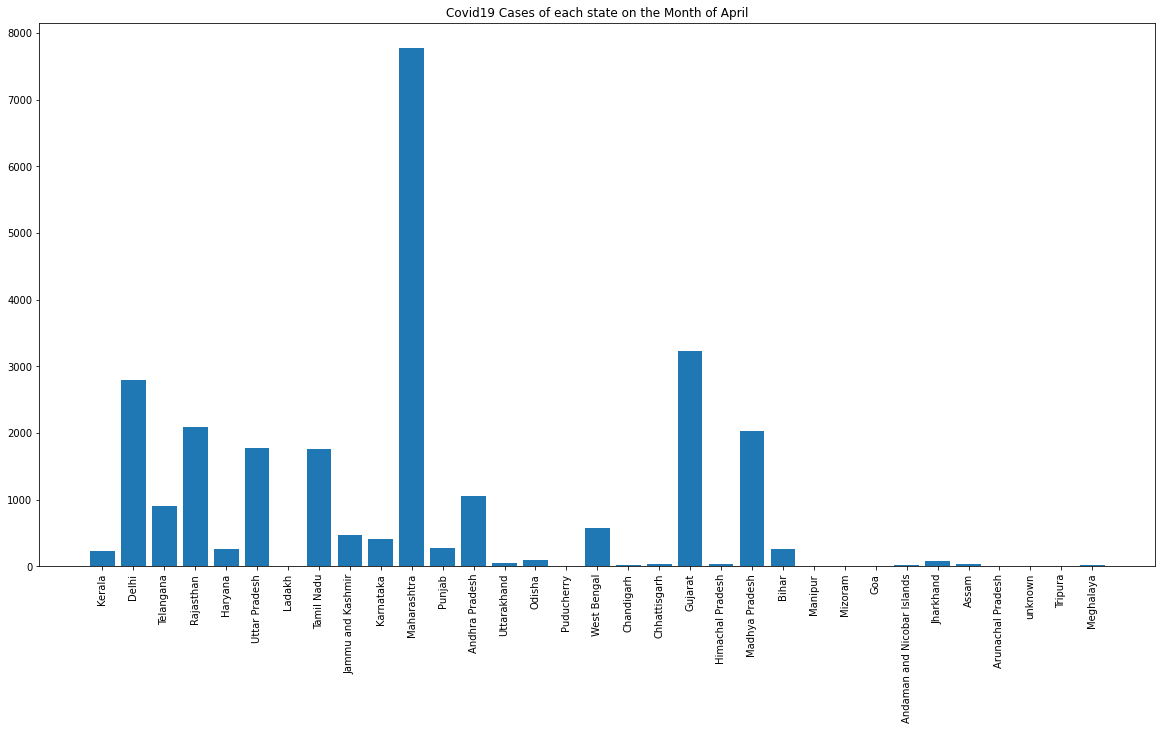

In [44]:

plt.figure(figsize=(20, 10))
keys = list(AprilRecordStateWise.keys())
values = list(AprilRecordStateWise.values())
plt.bar(keys,values)
plt.xticks(rotation=90)
plt.title('Covid19 Cases of each state on the Month of April')
plt.show()

In [45]:
for i in stateWise.keys():
    print(i, ':',len(stateWise[f'{i}'].loc[stateWise[f'{i}'].Month == '04'].loc[stateWise[f'{i}'].status == 'Hospitalized']))

Kerala : 227
Delhi : 2798
Telangana : 904
Rajasthan : 2092
Haryana : 253
Uttar Pradesh : 1768
Ladakh : 7
Tamil Nadu : 1761
Jammu and Kashmir : 468
Karnataka : 392
Maharashtra : 7757
Punjab : 279
Andhra Pradesh : 1053
Uttarakhand : 44
Odisha : 98
Puducherry : 7
West Bengal : 574
Chandigarh : 21
Chhattisgarh : 28
Gujarat : 3226
Himachal Pradesh : 37
Madhya Pradesh : 2024
Bihar : 256
Manipur : 1
Mizoram : 0
Goa : 2
Andaman and Nicobar Islands : 22
Jharkhand : 81
Assam : 35
Arunachal Pradesh : 1
unknown : 1
Tripura : 2
Meghalaya : 12


In [46]:
for i in stateWise.keys():
    print(i, ':',len(stateWise[f'{i}'].loc[stateWise[f'{i}'].Month == '04'].loc[stateWise[f'{i}'].status == 'Recovered']))
    
    
    
    

Kerala : 0
Delhi : 0
Telangana : 0
Rajasthan : 0
Haryana : 0
Uttar Pradesh : 0
Ladakh : 0
Tamil Nadu : 0
Jammu and Kashmir : 0
Karnataka : 1
Maharashtra : 0
Punjab : 0
Andhra Pradesh : 0
Uttarakhand : 0
Odisha : 0
Puducherry : 0
West Bengal : 0
Chandigarh : 0
Chhattisgarh : 0
Gujarat : 0
Himachal Pradesh : 0
Madhya Pradesh : 0
Bihar : 0
Manipur : 0
Mizoram : 0
Goa : 0
Andaman and Nicobar Islands : 1
Jharkhand : 0
Assam : 0
Arunachal Pradesh : 0
unknown : 0
Tripura : 0
Meghalaya : 0


## Interactive Dashboard for all the states

In [47]:
states = {}
for i in data.state.unique():
    states[f'{i}'] = data.loc[data.state == f'{i}'] 
    
    
def plotState(State):
        
        
    '''
        'Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', 'unknown', 'Tripura', 'Nagaland', 'Meghalaya'
        
    '''
        
    if State == 'All the state': data = All
    elif State== 'Kerala': data = states['Kerala']
    elif State== 'Delhi': data = states['Delhi']
    elif State== 'Telangana': data = states['Telangana']
    elif State== 'Rajasthan': data = states['Rajasthan']
    elif State== 'Haryana': data = states['Haryana']
    elif State== 'Uttar Pradesh': data = states['Uttar Pradesh']
    elif State== 'Maharashtra': data = states['Maharashtra']
    elif State== 'Ladakh': data = states['Ladakh']
    elif State== 'Tamil Nadu': data = states['Tamil Nadu']
    elif State== 'Jammu and Kashmir': data = states['Jammu and Kashmir']
    elif State== 'Andhra Pradesh': data = states['Andhra Pradesh']
    elif State== 'Punjab': data = states['Punjab']
    elif State== 'Maharashtra': data = states['Maharashtra']
    elif State== 'Karnataka': data = states['Karnataka']
    elif State== 'Uttarakhand': data = states['Uttarakhand']
    elif State== 'Odisha': data = states['Odisha']
    elif State== 'Puducherry': data = states['Puducherry']
    elif State== 'West Bengal': data = states['West Bengal']
    elif State== 'Chandigarh': data = states['Chandigarh']
    elif State== 'Chhattisgarh': data = states['Chhattisgarh']
    elif State== 'Gujarat': data = states['Gujarat']
    elif State== 'Himachal Pradesh': data = states['Himachal Pradesh']
    elif State== 'Madhya Pradesh': data = states['Madhya Pradesh']
    elif State== 'Bihar': data = states['Bihar']
    elif State== 'Manipur': data = states['Manipur']
    elif State== 'Mizoram': data = states['Mizoram']
    elif State== 'Goa': data = states['Goa']
    elif State== 'Andaman and Nicobar Islands': data = states['Andaman and Nicobar Islands']
    elif State== 'Jharkhand': data = states['Jharkhand']
    elif State== 'Assam': data = states['Assam']
    elif State== 'Meghalaya': data = states['Meghalaya']
    elif State== 'Nagaland': data = states['Nagaland']
    elif State== 'Tripura': data = states['Tripura']
    elif State== 'Arunachal Pradesh': data = states['Arunachal Pradesh']
    
    
        
    plt.figure(figsize=(20, 10))
    sns.barplot(data.status, (data.id), hue='status', data=data, palette='Dark2', 
                order = ['Hospitalized', 'Recovered', 'Deceased', 'Migrated'])
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.title('Status of each state per Month')
    plt.show()

    
interactive_plot = interactive(plotState, State = data.state.unique(), 
        xaxis = ['Number of People', 'Day'], yaxis = ['Status', 'Month'],
        contrast = ['Number of People', 'Day'])

interactive_plot

interactive(children=(Dropdown(description='State', options=('Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Har…

## Prediction Hypothesis

In [48]:
len(April.loc[April.Day == '19'] ) - len(April.loc[April.Day == '18'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [49]:
len(April.loc[April.Day == '16'] ) - len(April.loc[April.Day == '15'] )

0

In [50]:
April.loc[April.Day == 1]

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
1635,1635,1620,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1636,1636,1621,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1637,1637,1622,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1638,1638,1623,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
1639,1639,1624,01/04/2020,others/notIdentified,unknown,Maharashtra,Hospitalized,1,04
...,...,...,...,...,...,...,...,...,...
2054,2054,2056,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2055,2055,2057,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2056,2056,2058,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04
2057,2057,2059,01/04/2020,others/notIdentified,unknown,Madhya Pradesh,Hospitalized,1,04


In [51]:
diff = []

for i in range(30):
    diff.append(len(April.loc[April.Day == i]))
diff.append(1463)
diff.append(1594)
diff.append(1813)

In [52]:
diff.remove(0)
diff.remove(0)
diff.remove(0)
diff.remove(0)
diff

[424,
 486,
 560,
 579,
 609,
 485,
 573,
 565,
 813,
 871,
 854,
 758,
 1243,
 1031,
 886,
 1061,
 922,
 1371,
 1580,
 1239,
 1537,
 1292,
 1667,
 1408,
 1835,
 1607,
 1463,
 1594,
 1813]

In [53]:
diff = pd.Series(diff)

In [54]:
diff.fillna(0, inplace=True)

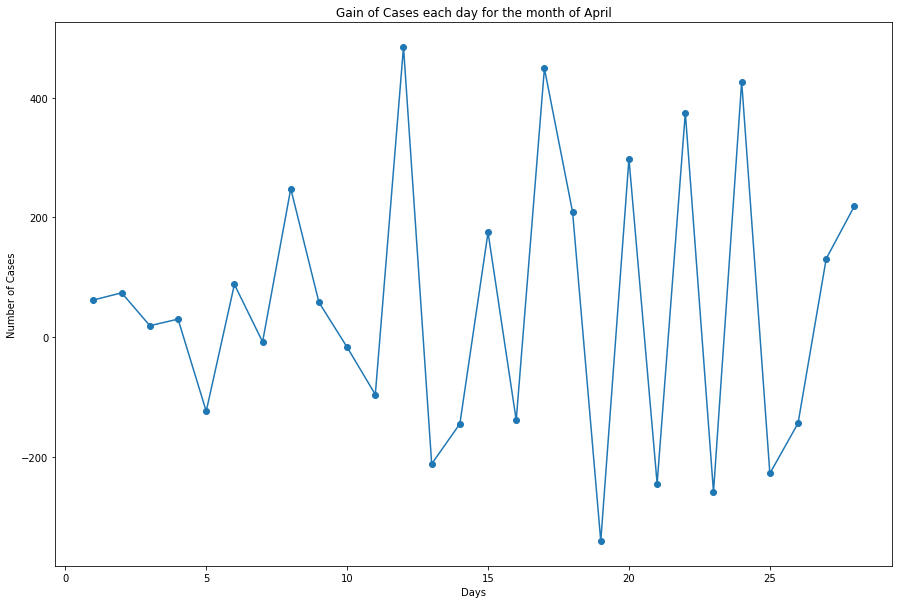

In [55]:
plt.figure(figsize=(15,10))
plt.plot(diff.diff()[1:], '-o')
plt.title('Gain of Cases each day for the month of April')

plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.show()

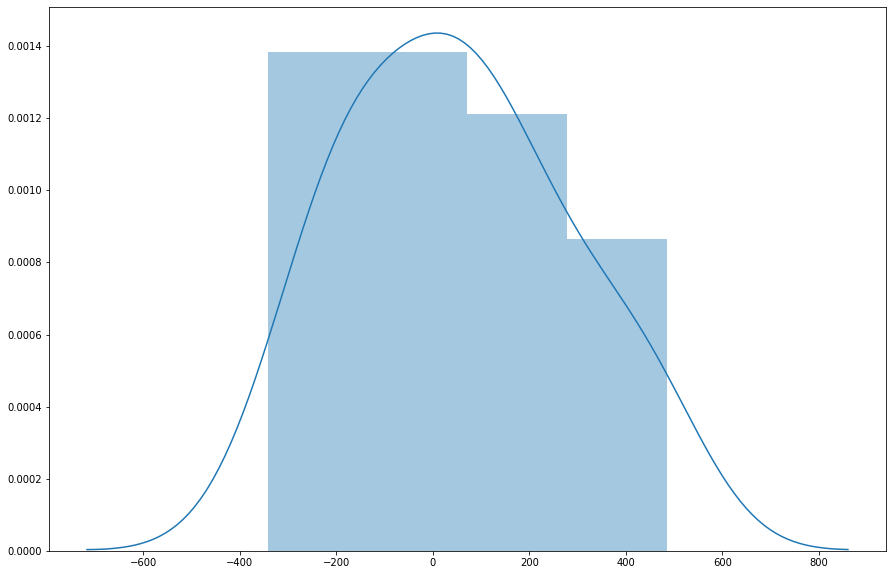

In [56]:
plt.figure(figsize=(15,10))
sns.distplot(diff.diff()[1:])

In [57]:
print(f"The growth rate of COVID19 in India is {np.log(diff.mean())} or we can assume that {diff.mean()} number people are getting affected each day.")

The growth rate of COVID19 in India is 6.978502931778482 or we can assume that 1073.3103448275863 number people are getting affected each day.


In [58]:
marchCases = []
for i in range(2,32):
    marchCases.append(len(March.loc[March.Day==i]))
    
    

In [59]:
marchCases

[2,
 1,
 22,
 2,
 1,
 3,
 5,
 9,
 15,
 8,
 10,
 10,
 11,
 10,
 14,
 20,
 25,
 27,
 58,
 78,
 69,
 94,
 74,
 86,
 73,
 153,
 136,
 120,
 187,
 309]

In [60]:
marchCases = pd.Series(marchCases[1:])

In [61]:
aprilCases = diff[1:]

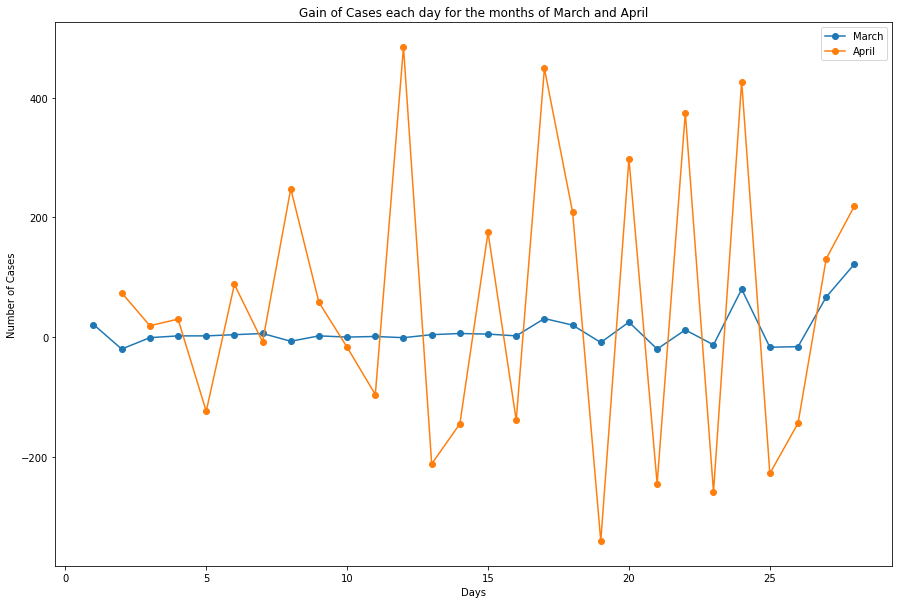

In [62]:
plt.figure(figsize=(15,10))
plt.plot(marchCases.diff()[1:], '-o', label='March')
plt.plot(aprilCases.diff()[1:], '-o', label='April')
plt.title('Gain of Cases each day for the months of March and April')

plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()

plt.show()

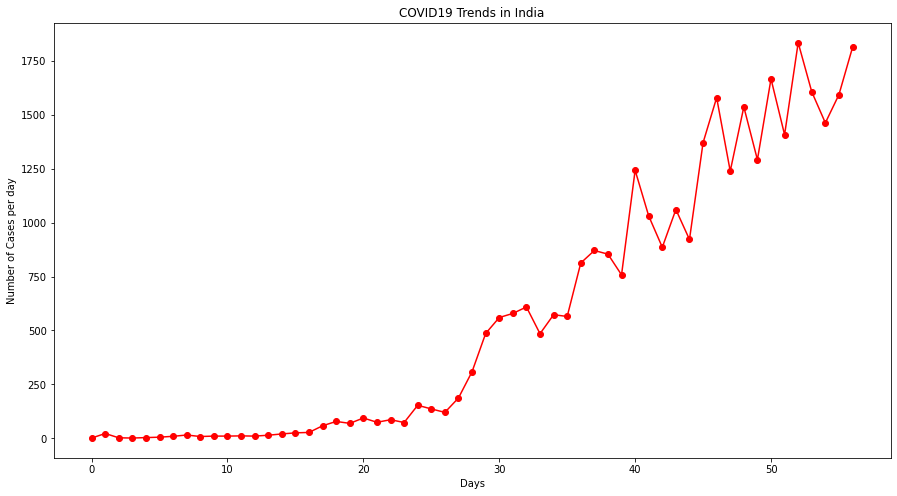

In [63]:
plt.figure(figsize=(15, 8))
plt.title('COVID19 Trends in India')
plt.plot(pd.concat([marchCases, aprilCases], 0, ignore_index=True), 'r-o')
plt.xlabel('Days')
plt.ylabel('Number of Cases per day')
plt.show()

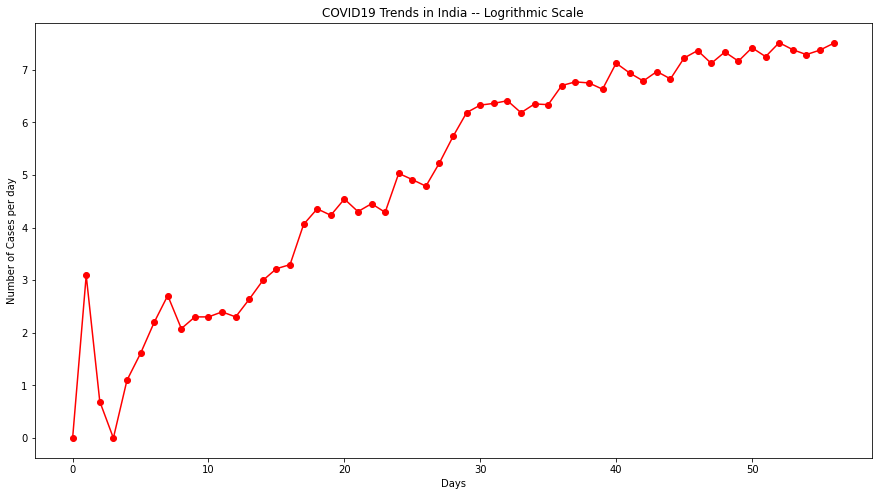

In [64]:
plt.figure(figsize=(15, 8))
plt.title('COVID19 Trends in India -- Logrithmic Scale')
plt.plot(np.log(pd.concat([marchCases, aprilCases], 0, ignore_index=True)), 'r-o')
plt.xlabel('Days')
plt.ylabel('Number of Cases per day')
plt.show()

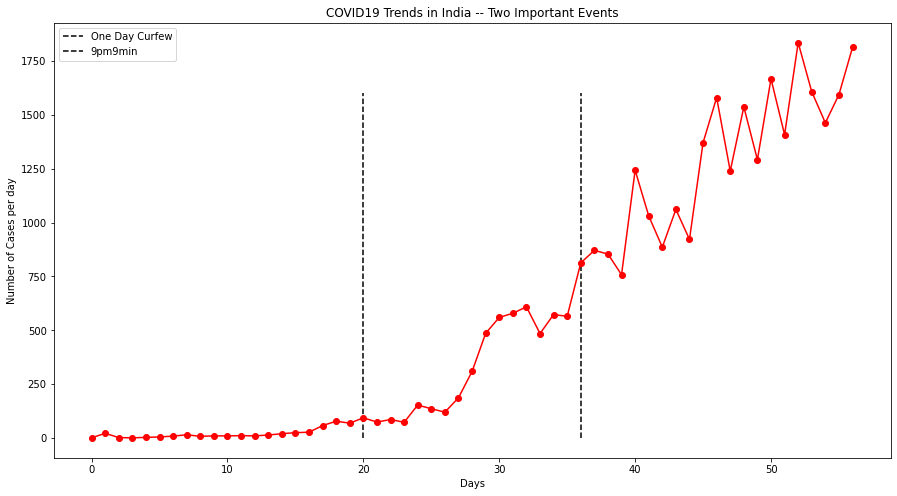

In [65]:
plt.figure(figsize=(15, 8))
plt.title('COVID19 Trends in India -- Two Important Events')
plt.plot(pd.concat([marchCases, aprilCases], 0, ignore_index=True), 'r-o')
plt.xlabel('Days')
plt.ylabel('Number of Cases per day')

plt.vlines(20, 0, 1600, linestyles = '--', label='One Day Curfew')
plt.vlines(36, 0, 1600, linestyles = '--', label='9pm9min')

plt.legend()
plt.show()

People who are infected with Covid19 usually takes 7 to 10 days to get hospitalise. It means there are infected people still unaware of the virus in them.

# Prediction

In [66]:
data.reportedOn = pd.to_datetime(data.reportedOn, format='%d/%m/%Y')

In [67]:
data.head()

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
0,0,1,2020-01-30,female,Thrissur,Kerala,Recovered,30,01
1,1,2,2020-02-02,others/notIdentified,Alappuzha,Kerala,Recovered,02,02
2,2,3,2020-02-03,others/notIdentified,Kasaragod,Kerala,Recovered,03,02
3,3,4,2020-03-02,male,East Delhi (Mayur Vihar),Delhi,Recovered,02,03
4,4,5,2020-03-02,male,Hyderabad,Telangana,Recovered,02,03


In [68]:
data.loc[data.Month=='03'].loc[data.Day=='02']

,Unnamed: 0,id,reportedOn,sex,city,state,status,Day,Month
3,3,4,2020-03-02,male,East Delhi (Mayur Vihar),Delhi,Recovered,02,03
4,4,5,2020-03-02,male,Hyderabad,Telangana,Recovered,02,03


In [69]:
df = {}
for i in range(1,10):
    df[f'2020-03-0{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'0{i}'])
for i in range(10,32):
    df[f'2020-03-{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'{i}'])
    
for i in range(1,10):
    df[f'2020-04-0{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'0{i}'])
for i in range(10,30):
    df[f'2020-04-{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'{i}'])
    
df['2020-04-27'] = 1463
df['2020-04-28'] = 1594
df['2020-04-29'] = 1813

In [70]:
df

{'2020-03-01': 0,
 '2020-03-02': 2,
 '2020-03-03': 1,
 '2020-03-04': 22,
 '2020-03-05': 2,
 '2020-03-06': 1,
 '2020-03-07': 3,
 '2020-03-08': 5,
 '2020-03-09': 9,
 '2020-03-10': 15,
 '2020-03-11': 8,
 '2020-03-12': 10,
 '2020-03-13': 10,
 '2020-03-14': 11,
 '2020-03-15': 10,
 '2020-03-16': 14,
 '2020-03-17': 20,
 '2020-03-18': 25,
 '2020-03-19': 27,
 '2020-03-20': 58,
 '2020-03-21': 78,
 '2020-03-22': 69,
 '2020-03-23': 94,
 '2020-03-24': 74,
 '2020-03-25': 86,
 '2020-03-26': 73,
 '2020-03-27': 153,
 '2020-03-28': 136,
 '2020-03-29': 120,
 '2020-03-30': 187,
 '2020-03-31': 309,
 '2020-04-01': 424,
 '2020-04-02': 486,
 '2020-04-03': 560,
 '2020-04-04': 579,
 '2020-04-05': 609,
 '2020-04-06': 485,
 '2020-04-07': 573,
 '2020-04-08': 565,
 '2020-04-09': 813,
 '2020-04-10': 871,
 '2020-04-11': 854,
 '2020-04-12': 758,
 '2020-04-13': 1243,
 '2020-04-14': 1031,
 '2020-04-15': 886,
 '2020-04-16': 1061,
 '2020-04-17': 922,
 '2020-04-18': 1371,
 '2020-04-19': 1580,
 '2020-04-20': 1239,
 '2020-04

In [71]:
df = pd.DataFrame([df.keys(), df.values()]).T

In [72]:
df.head()

,0,1
0,2020-03-01,0
1,2020-03-02,2
2,2020-03-03,1
3,2020-03-04,22
4,2020-03-05,2


In [73]:
df.rename(columns={0:'Date', 1:'Cases'}, inplace=True)

In [74]:
df.tail()

,Date,Cases
55,2020-04-25,1835
56,2020-04-26,1607
57,2020-04-27,1463
58,2020-04-28,1594
59,2020-04-29,1813


In [75]:
df.Date = pd.to_datetime(df.Date)

In [76]:
df.set_index('Date', inplace=True)

In [77]:
df.Cases = pd.to_numeric(df.Cases).astype('float64')

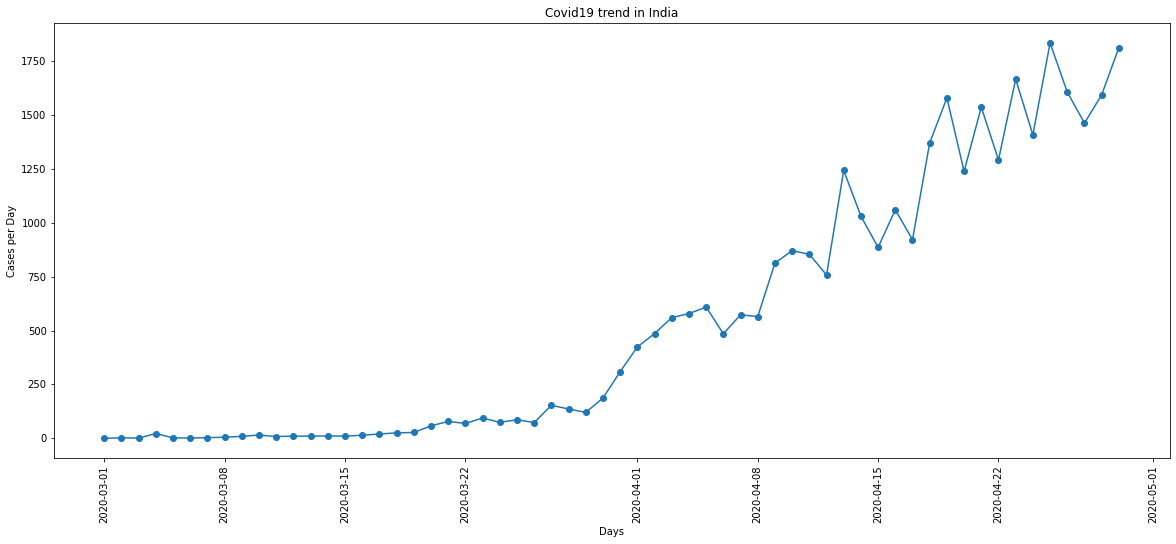

In [78]:
plt.figure(figsize=(20, 8))
plt.plot(df.Cases, '-o')
plt.xlabel('Days')
plt.ylabel('Cases per Day')
plt.xticks(rotation=90)

plt.title('Covid19 trend in India')

plt.show()

In [79]:
df.Cases

Date
2020-03-01       0.0
2020-03-02       2.0
2020-03-03       1.0
2020-03-04      22.0
2020-03-05       2.0
2020-03-06       1.0
2020-03-07       3.0
2020-03-08       5.0
2020-03-09       9.0
2020-03-10      15.0
2020-03-11       8.0
2020-03-12      10.0
2020-03-13      10.0
2020-03-14      11.0
2020-03-15      10.0
2020-03-16      14.0
2020-03-17      20.0
2020-03-18      25.0
2020-03-19      27.0
2020-03-20      58.0
2020-03-21      78.0
2020-03-22      69.0
2020-03-23      94.0
2020-03-24      74.0
2020-03-25      86.0
2020-03-26      73.0
2020-03-27     153.0
2020-03-28     136.0
2020-03-29     120.0
2020-03-30     187.0
2020-03-31     309.0
2020-04-01     424.0
2020-04-02     486.0
2020-04-03     560.0
2020-04-04     579.0
2020-04-05     609.0
2020-04-06     485.0
2020-04-07     573.0
2020-04-08     565.0
2020-04-09     813.0
2020-04-10     871.0
2020-04-11     854.0
2020-04-12     758.0
2020-04-13    1243.0
2020-04-14    1031.0
2020-04-15     886.0
2020-04-16    1061.0
2020-04-

In [80]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [81]:
p = d = q = range(0,9)
pdq = list(itertools.product(p,d,q))

season_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p,d,q))]
season_pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [82]:
import warnings
warnings.filterwarnings('ignore')
param = []
for i in pdq:
    try:
        model = ARIMA(df, order=i)
        model_fit = model.fit()
        print(i, model_fit.aic)
        param.append(i, model_fit.aic)
    except:
        continue

(0, 0, 0) 941.2878723604965
(0, 0, 1) 892.516576873871
(0, 0, 2) 859.3322918907386
(0, 0, 3) 834.7550493696599
(0, 0, 4) 830.9259175764262
(0, 1, 0) 769.312643787875
(0, 1, 1) 751.4769775629678
(0, 1, 2) 752.5125872123807
(0, 1, 3) 754.512135768505
(0, 1, 4) 754.6398089016626
(0, 1, 5) 755.238641517642
(0, 1, 6) 755.6352332778864
(0, 1, 7) 757.563153222091
(0, 1, 8) 755.3106269286991
(0, 2, 0) 820.9589036431558
(0, 2, 1) 762.3322655467173
(0, 2, 2) 739.3087678134225
(0, 2, 3) 741.2943606950819
(0, 2, 4) 741.7340878596144
(0, 2, 6) 743.6542156531812
(0, 2, 7) 745.7967072205986
(0, 2, 8) 747.5173286976221
(1, 0, 0) 789.1645975751102
(1, 1, 0) 753.3185509500161
(1, 1, 1) 752.4576830911487
(1, 1, 2) 754.3287190636386
(1, 1, 3) 751.4953365222926
(1, 2, 0) 780.7606911867877
(2, 0, 0) 777.3522270336979
(2, 1, 0) 753.6909704607403
(2, 1, 1) 754.4202955346475
(2, 1, 2) 755.6794427804621
(2, 1, 3) 753.2892973565868
(2, 1, 4) 753.0417316078733
(2, 1, 6) 756.0770827656708
(2, 2, 0) 771.22237173231

In [83]:
param

[]

In [84]:
model = ARIMA(df, order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Cases   No. Observations:                   58
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -378.166
Method:                       css-mle   S.D. of innovations            158.541
Date:                Thu, 30 Apr 2020   AIC                            762.332
Time:                        16:29:36   BIC                            768.514
Sample:                    03-03-2020   HQIC                           764.740
                         - 04-29-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2643      1.212      1.043      0.297      -1.111       3.640
ma.L1.D2.Cases    -1.0000      0.043    -23.328      0.000      -1.084      -0.916
                                    

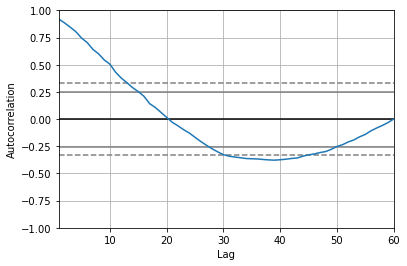

<Figure size 800x560 with 0 Axes>

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

<Figure size 1440x720 with 0 Axes>

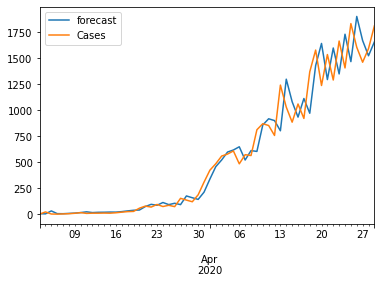

In [86]:
ax = plt.figure(figsize=(20,10))
model_fit.plot_predict()
plt.show()

In [87]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

param = []
X = df.Cases.values
size = int(len(X) * 0.4)
train, test = X[0:40], X[40:]

history = [x for x in train]
predictions = []
for i,j in zip(range(len(test)), pdq):
    
    try:
        model = ARIMA(df, order=j)
        model_fit = model.fit()
        print(i,j, model_fit.aic)

    except:
        continue
        
    model = ARIMA(df, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)

0 (0, 0, 0) 941.2878723604965
1 (0, 0, 1) 892.516576873871
2 (0, 0, 2) 859.3322918907386
3 (0, 0, 3) 834.7550493696599
4 (0, 0, 4) 830.9259175764262
9 (0, 1, 0) 769.312643787875
10 (0, 1, 1) 751.4769775629678
11 (0, 1, 2) 752.5125872123807
12 (0, 1, 3) 754.512135768505
13 (0, 1, 4) 754.6398089016626
14 (0, 1, 5) 755.238641517642
15 (0, 1, 6) 755.6352332778864
16 (0, 1, 7) 757.563153222091
17 (0, 1, 8) 755.3106269286991
18 (0, 2, 0) 820.9589036431558
19 (0, 2, 1) 762.3322655467173


In [88]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = df.Cases.values
# size = int(len(X) * 0.4)
train, test = X[0:50], X[50:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [89]:
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.log(error))

Test RMSE: 10.686


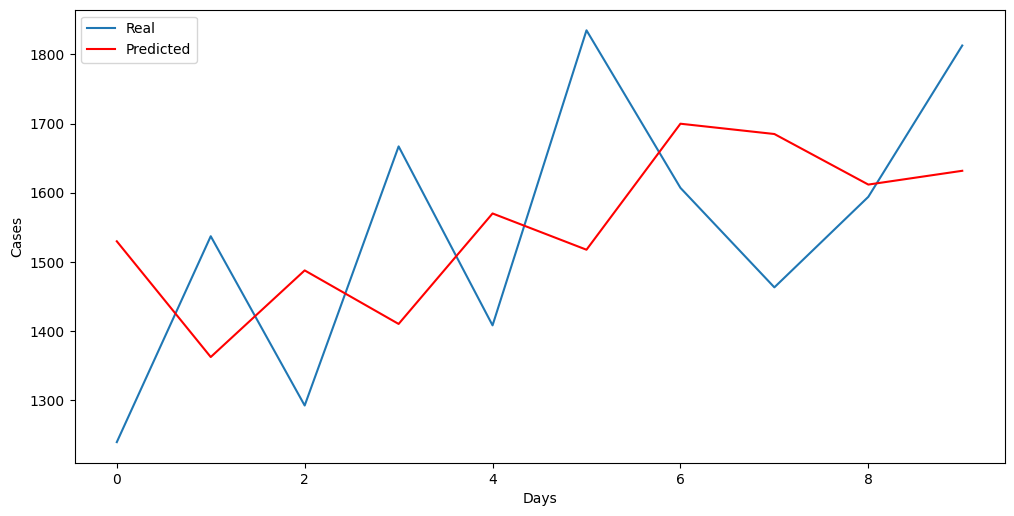

In [90]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [91]:
for i in pdq:
    for j in season_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
            preprocess.Close, order = i, 
            seasonal_order = j,
            enforce_stationarity = False,
            enforce_invertibility = False)
            result = mod.fit()
            print(result.aic)
        except:
            continue

In [92]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.Cases,
                               order=(0,2,1),
                               seasonal_order=(4,1,0,12),
                               enforce_invertibility=False, 
                               enforce_stationarity=False)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                   60
Model:             SARIMAX(0, 2, 1)x(4, 1, [], 12)   Log Likelihood                   0.000
Date:                             Thu, 30 Apr 2020   AIC                             12.000
Time:                                     16:29:43   BIC                                nan
Sample:                                 03-01-2020   HQIC                               nan
                                      - 04-29-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9676         -0        inf      0.000      -0.968      -0.968
ar.S.L12            0         -0        nan        nan           0           0
ar.S.L24            0         -0        nan        nan           0           0
ar.S.L36            0         -0        nan        nan           0           0
ar.S.L48            0         -0        nan        nan           0           0
sigma2      4.754e+04         -0       -inf      0.000    4.75e+04    4.75e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [93]:
pred = result.forecasts

In [94]:
date_pred = pd.date_range('2020-03-03', periods = 60, freq ='D')

In [95]:
prediction_df = pd.DataFrame({'prediction':pred[0], 'Dates':date_pred})

In [96]:
prediction_df = prediction_df.set_index('Dates')

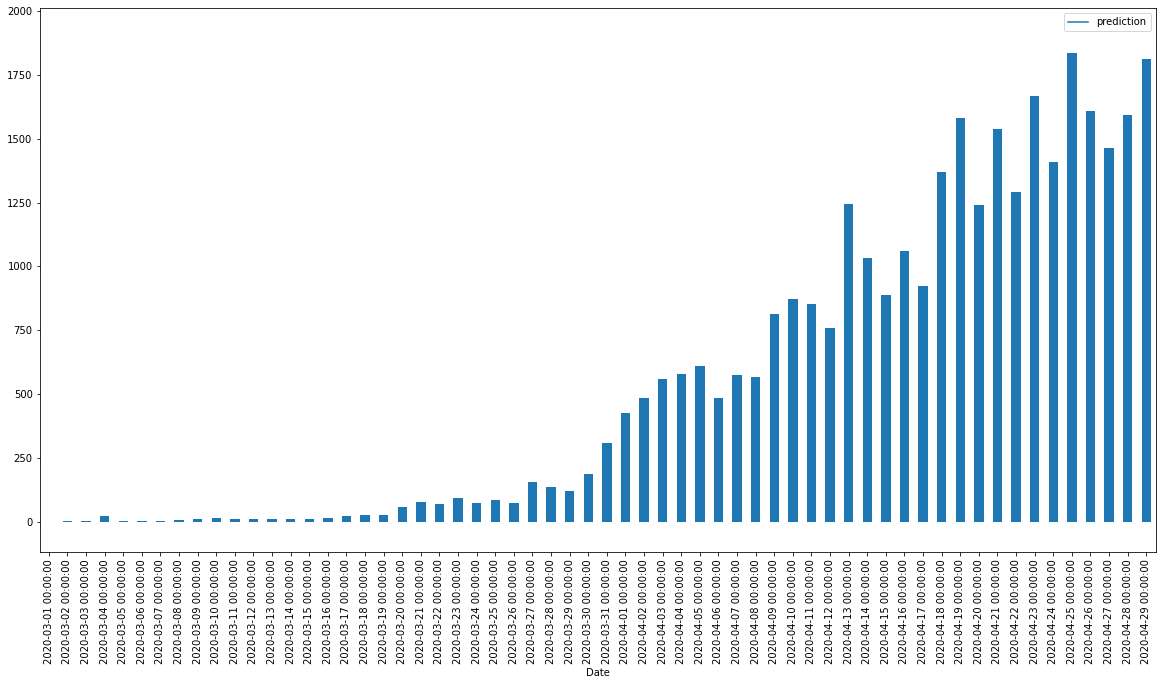

In [97]:
prediction_df.plot(figsize=(20,10))
df.Cases.plot(kind='bar')
# result.forecast().plot(kind='bar'

In [98]:
result.forecast()['2020-04-30']

2294.5940170846807

In [99]:
df_pred = {}
for i in range(1,10):
    df_pred[f'2020-03-0{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'0{i}'])
for i in range(10,32):
    df_pred[f'2020-03-{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'{i}'])
    
for i in range(1,10):
    df_pred[f'2020-04-0{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'0{i}'])
for i in range(10,30):
    df_pred[f'2020-04-{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'{i}'])
    
df_pred['2020-04-27'] = 1463
df_pred['2020-04-28'] = 1594
df_pred['2020-04-29'] = 1813

In [100]:
df_pred

{'2020-03-01': 0,
 '2020-03-02': 2,
 '2020-03-03': 1,
 '2020-03-04': 22,
 '2020-03-05': 2,
 '2020-03-06': 1,
 '2020-03-07': 3,
 '2020-03-08': 5,
 '2020-03-09': 9,
 '2020-03-10': 15,
 '2020-03-11': 8,
 '2020-03-12': 10,
 '2020-03-13': 10,
 '2020-03-14': 11,
 '2020-03-15': 10,
 '2020-03-16': 14,
 '2020-03-17': 20,
 '2020-03-18': 25,
 '2020-03-19': 27,
 '2020-03-20': 58,
 '2020-03-21': 78,
 '2020-03-22': 69,
 '2020-03-23': 94,
 '2020-03-24': 74,
 '2020-03-25': 86,
 '2020-03-26': 73,
 '2020-03-27': 153,
 '2020-03-28': 136,
 '2020-03-29': 120,
 '2020-03-30': 187,
 '2020-03-31': 309,
 '2020-04-01': 424,
 '2020-04-02': 486,
 '2020-04-03': 560,
 '2020-04-04': 579,
 '2020-04-05': 609,
 '2020-04-06': 485,
 '2020-04-07': 573,
 '2020-04-08': 565,
 '2020-04-09': 813,
 '2020-04-10': 871,
 '2020-04-11': 854,
 '2020-04-12': 758,
 '2020-04-13': 1243,
 '2020-04-14': 1031,
 '2020-04-15': 886,
 '2020-04-16': 1061,
 '2020-04-17': 922,
 '2020-04-18': 1371,
 '2020-04-19': 1580,
 '2020-04-20': 1239,
 '2020-04

In [101]:
df_pred['2020-04-30'] = result.forecast()['2020-04-30']

In [102]:
result.forecast()['2020-04-30']

2294.5940170846807

In [103]:
df_pred
df_pred = pd.DataFrame([df_pred.keys(), df_pred.values()]).T
df_pred.rename(columns={0:'Date', 1:'Cases'}, inplace=True)


In [104]:

df_pred.Date = pd.to_datetime(df_pred.Date)
df_pred.set_index('Date', inplace=True)
df_pred.Cases = pd.to_numeric(df_pred.Cases).astype('float64')

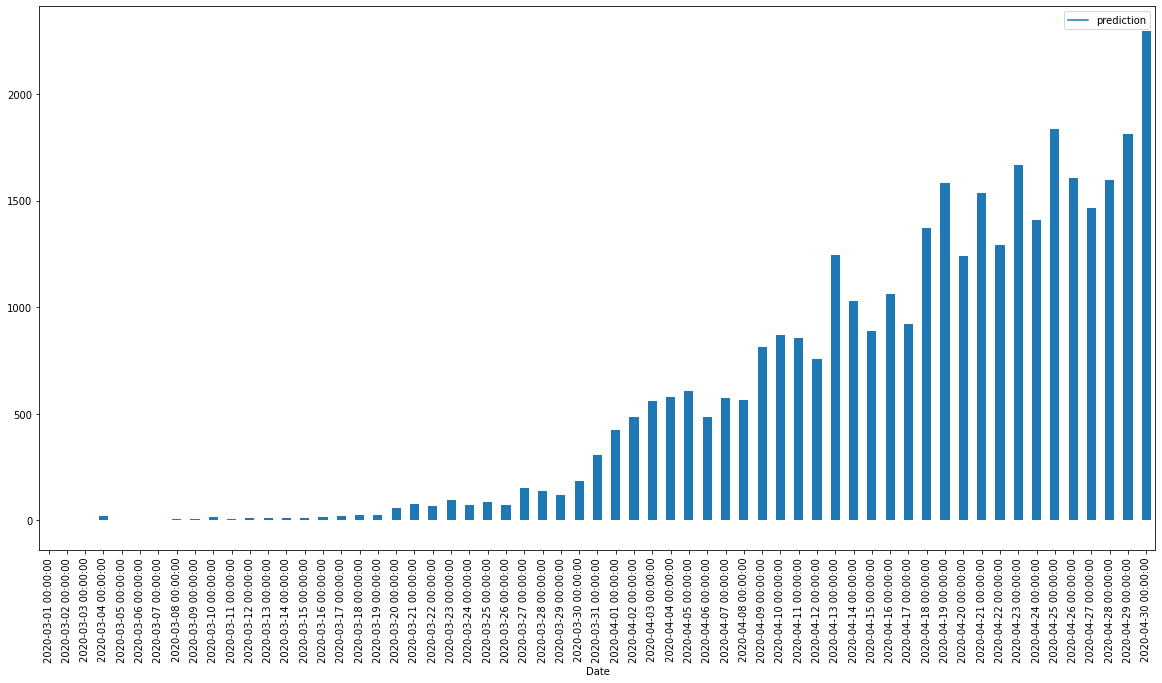

In [105]:
prediction_df.plot(figsize=(20,10))
df_pred.Cases.plot(kind='bar')

# Neural Networks

In [106]:
df_nn = {}
for i in range(1,10):
    df_nn[f'2020-03-0{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'0{i}'])
for i in range(10,32):
    df_nn[f'2020-03-{i}'] = len(data.loc[data.Month=='03'].loc[data.Day==f'{i}'])
    
for i in range(1,10):
    df_nn[f'2020-04-0{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'0{i}'])
for i in range(10,30):
    df_nn[f'2020-04-{i}'] = len(data.loc[data.Month=='04'].loc[data.Day==f'{i}'])
    
df_nn['2020-04-27'] = 1463
df_nn['2020-04-28'] = 1594
df_nn['2020-04-29'] = 1813


df_nn = pd.DataFrame([df_nn.keys(), df_nn.values()]).T
df_nn.rename(columns={0:'Date', 1:'Cases'}, inplace=True)

In [107]:
df_nn.head()

,Date,Cases
0,2020-03-01,0
1,2020-03-02,2
2,2020-03-03,1
3,2020-03-04,22
4,2020-03-05,2


In [108]:
data_nn = df_nn[['Cases']]

In [109]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = RobustScaler()
training_set_scaled = scaler.fit_transform(data_nn)

In [110]:
X_train = []
y_train = []
for i in range(2, 60):
    X_train.append(training_set_scaled[i-2:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_test = []
for i in range(40, 60):
    X_test.append(training_set_scaled[i-2:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [111]:
X_test

[array([0.34067706, 0.60720043]),
 array([0.60720043, 0.66953251]),
 array([0.66953251, 0.65126276]),
 array([0.65126276, 0.54809242]),
 array([0.54809242, 1.06931757]),
 array([1.06931757, 0.84148307]),
 array([0.84148307, 0.68565287]),
 array([0.68565287, 0.8737238 ]),
 array([0.8737238 , 0.72434175]),
 array([0.72434175, 1.20687802]),
 array([1.20687802, 1.43148845]),
 array([1.43148845, 1.06501881]),
 array([1.06501881, 1.38527673]),
 array([1.38527673, 1.12197743]),
 array([1.12197743, 1.52498657]),
 array([1.52498657, 1.24664159]),
 array([1.24664159, 1.70553466]),
 array([1.70553466, 1.4605051 ]),
 array([1.4605051, 1.3057496]),
 array([1.3057496 , 1.44653412])]

In [112]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[-0.26652337],
        [-0.26437399]],

       [[-0.26437399],
        [-0.26544868]],

       [[-0.26544868],
        [-0.24288017]],

       [[-0.24288017],
        [-0.26437399]],

       [[-0.26437399],
        [-0.26544868]],

       [[-0.26544868],
        [-0.2632993 ]],

       [[-0.2632993 ],
        [-0.26114992]],

       [[-0.26114992],
        [-0.25685116]],

       [[-0.25685116],
        [-0.25040301]],

       [[-0.25040301],
        [-0.25792585]],

       [[-0.25792585],
        [-0.25577646]],

       [[-0.25577646],
        [-0.25577646]],

       [[-0.25577646],
        [-0.25470177]],

       [[-0.25470177],
        [-0.25577646]],

       [[-0.25577646],
        [-0.2514777 ]],

       [[-0.2514777 ],
        [-0.24502955]],

       [[-0.24502955],
        [-0.2396561 ]],

       [[-0.2396561 ],
        [-0.23750672]],

       [[-0.23750672],
        [-0.2041913 ]],

       [[-0.2041913 ],
        [-0.18269747]],

       [[-0.18269747],
        [-0.19236

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [114]:
regressor = Sequential()

regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 10))
regressor.add(Dropout(0.5))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [115]:
history = regressor.fit(X_train, y_train, epochs = 100, validation_split=0.2)

Train on 46 samples, validate on 12 samples
Epoch 1/100
46/46 [==============================] - 7s 156ms/sample - loss: 0.1596 - val_loss: 1.9402
Epoch 2/100
46/46 [==============================] - 0s 733us/sample - loss: 0.1593 - val_loss: 1.9205
Epoch 3/100
46/46 [==============================] - 0s 755us/sample - loss: 0.1586 - val_loss: 1.8979
Epoch 4/100
46/46 [==============================] - 0s 766us/sample - loss: 0.1568 - val_loss: 1.8794
Epoch 5/100
46/46 [==============================] - 0s 751us/sample - loss: 0.1575 - val_loss: 1.8629
Epoch 6/100
46/46 [==============================] - 0s 745us/sample - loss: 0.1581 - val_loss: 1.8495
Epoch 7/100
46/46 [==============================] - 0s 703us/sample - loss: 0.1558 - val_loss: 1.8352
Epoch 8/100
46/46 [==============================] - 0s 663us/sample - loss: 0.1604 - val_loss: 1.8239
Epoch 9/100
46/46 [==============================] - 0s 895us/sample - loss: 0.1536 - val_loss: 1.8106
Epoch 10/100
46/46 [=========

46/46 [==============================] - 0s 676us/sample - loss: 0.0554 - val_loss: 0.1731
Epoch 80/100
46/46 [==============================] - 0s 615us/sample - loss: 0.0349 - val_loss: 0.1759
Epoch 81/100
46/46 [==============================] - 0s 590us/sample - loss: 0.0287 - val_loss: 0.1709
Epoch 82/100
46/46 [==============================] - 0s 689us/sample - loss: 0.0385 - val_loss: 0.1560
Epoch 83/100
46/46 [==============================] - 0s 761us/sample - loss: 0.0386 - val_loss: 0.1403
Epoch 84/100
46/46 [==============================] - 0s 2ms/sample - loss: 0.0571 - val_loss: 0.1344
Epoch 85/100
46/46 [==============================] - 0s 2ms/sample - loss: 0.0299 - val_loss: 0.1409
Epoch 86/100
46/46 [==============================] - 0s 3ms/sample - loss: 0.0242 - val_loss: 0.1448
Epoch 87/100
46/46 [==============================] - 0s 2ms/sample - loss: 0.0424 - val_loss: 0.1480
Epoch 88/100
46/46 [==============================] - 0s 2ms/sample - loss: 0.0375 - 

In [116]:
X_test = np.array(X_test
                 )
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cases = regressor.predict(X_train)
predicted_cases = scaler.inverse_transform(predicted_cases)

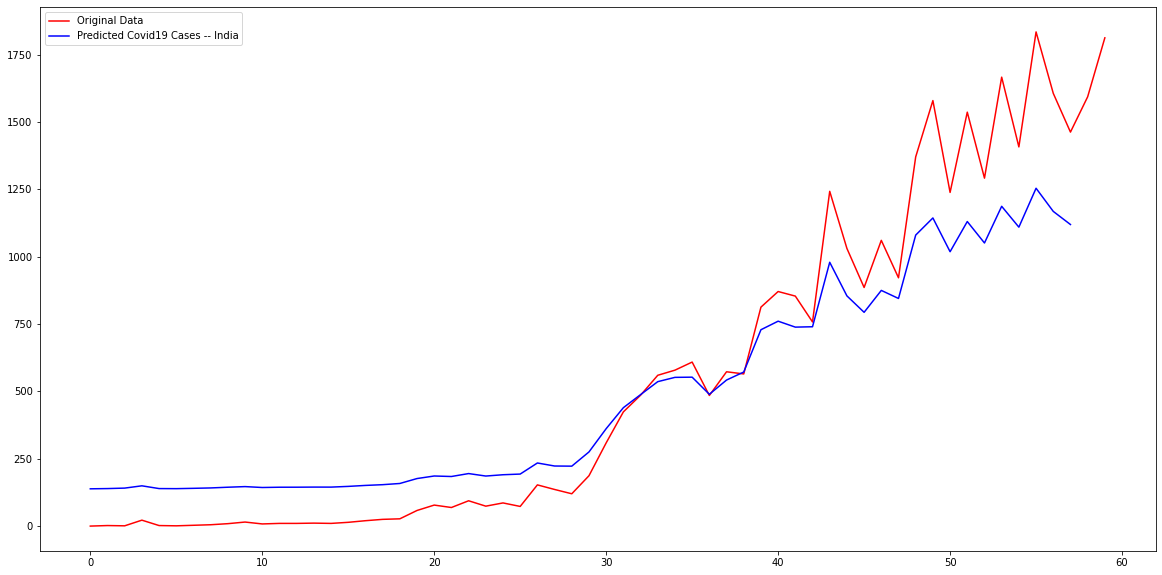

In [117]:
plt.figure(figsize=(20,10))
plt.plot(data_nn, color = 'red', label = 'Original Data')
plt.plot(predicted_cases, color = 'blue', label = 'Predicted Covid19 Cases -- India')

plt.legend()